In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Values to modify in the graphing process
def plot_vel_profile(d1, d2, mu1, mu2,K, U0, N_POINTS, save=None):

    ####################################
    m = mu2 / mu1
    n = d2 / d1

    y1s = np.linspace(0, d1, N_POINTS) / d1
    y2s = np.linspace(-d2, 0, N_POINTS) / d1

    A2 = -(.5 * (K / mu2) * U0) * (d1 ** 2)
    A1 = m * A2

    a2 = (1 + A2 * (n**2 - m)) / (m + n)
    a1 = m * a2

    b = ((1 - A1*(1 + n)) * n) / (m + n)

    U1 = A1 * (y1s ** 2) + a1 * y1s + b
    U2 = A2 * (y2s ** 2) + a2 * y2s + b

    velocity_profile = np.concatenate((U2, U1))

    fig = plt.figure(figsize=(8,5))
    plt.axhline(y=0, color="black", linestyle ="--") 
    plt.axhline(y= d1 / d1, color="black", linestyle ="--") 
    plt.axhline(y= -d2 / d1, color="black", linestyle ="--") 
    plt.plot(velocity_profile, np.concatenate((y2s, y1s)))
    
    title="Velocity Profile n={}, m={}, K={}, U0={}".format(d2 / d1, mu2 / mu1, K, U0)
    plt.title(title)
    plt.ylabel("Flow height / d1, U1 > 0, U2 < 0")
    plt.xlabel("Velocity of flow")
    
    if save != None:
        plt.savefig(save)


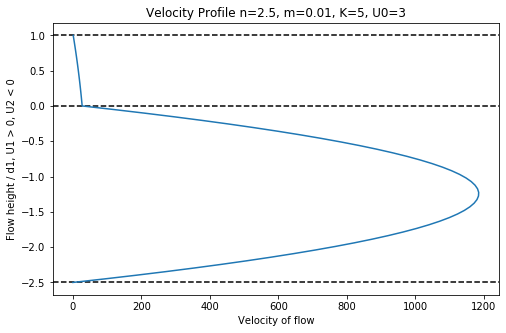

In [27]:
d1 = 1
mu1 = 1

d2 = 2.5
mu2 = .01
K = 5
U0 = 3
N_POINTS = 50

save = "images/vel_profiles/m{}n{}K{}U0{}".format(mu2 / mu1, d2 / d1, K, U0)
save = save.replace(".", ":")
#save = None
plot_vel_profile(d1, d2, mu1, mu2, K, U0, N_POINTS, save=save)